In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-recalls-dataset/FDA_drug_recalls.csv


In [115]:
import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv("/kaggle/input/drug-recalls-dataset/FDA_drug_recalls.csv", low_memory=False)
pd.options.display.max_columns=None

df.head()

,status,city,state,country,classification,product_type,event_id,recalling_firm,address_1,address_2,postal_code,voluntary_mandated,initial_firm_notification,distribution_pattern,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,report_date,code_info,openfda.application_number,openfda.brand_name,openfda.generic_name,openfda.manufacturer_name,openfda.product_ndc,openfda.product_type,openfda.route,openfda.substance_name,openfda.rxcui,openfda.spl_id,openfda.spl_set_id,openfda.package_ndc,openfda.is_original_packager,openfda.upc,openfda.unii,openfda.nui,openfda.pharm_class_epc,openfda.pharm_class_moa,openfda.pharm_class_cs,openfda.pharm_class_pe,more_code_info,termination_date,openfda.original_packager_product_ndc
0,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0350-2025,"Pravastatin Sodium Tablets, USP, 80mg, a).90-c...",NaN,CGMP Deviations,20250313,20250408,20250416,"Lot # 17221770, exp. date Aug-25 17221774, ex...",['ANDA077987'],['PRAVASTATIN SODIUM'],['PRAVASTATIN SODIUM'],['NorthStar RxLLC'],"['16714-558', '16714-559', '16714-560', '16714...",['HUMAN PRESCRIPTION DRUG'],['ORAL'],['PRAVASTATIN SODIUM'],"['904458', '904467', '904475', '904481']",['fa078b35-ee9d-4b9f-bb8d-e77949c09f88'],['ce15ad07-3286-478f-9f30-1db6a45ed402'],"['16714-558-01', '16714-558-02', '16714-559-01...",[True],"['0316714570013', '0316714559018', '0316714560...",['3M8608UQ61'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0348-2025,"Cetirizine Hydrochloride Tablets, USP, 10mg, 3...",NaN,CGMP Deviations,20250313,20250408,20250416,"Lot # 17231980, ep.. date Aug-25 Amazon 17232...",['ANDA078427'],['CETIRIZINE HCL'],['CETIRIZINE'],"['GLENMARK THERAPEUTICS INC., USA']","['72657-128', '72657-129', '72657-130', '72657...",['HUMAN OTC DRUG'],['ORAL'],['CETIRIZINE HYDROCHLORIDE'],"['1014676', '1014678']",['fd1924df-96c1-4429-944d-bd09a7dd2a6b'],['04b08c52-5390-4cdb-a9e7-fca81fffdc73'],"['72657-128-30', '72657-128-45', '72657-128-60...",[True],"['0372657129350', '0372657128353']",['64O047KTOA'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ongoing,Bengaluru,NaN,India,Class II,Drugs,96569,Somerset Therapeutics Private Limited,54/1 Budihal Village,NaN,NaN,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0356-2025,"Haloperidol Decanoate Injection 50mg/mL, 1mL S...",4956 vials,Lack of Assurance of Sterility: Media fill wit...,20250321,20250408,20250416,"A240467B, exp. date 07/2026",['ANDA209101'],['HALOPERIDOL DECANOATE'],['HALOPERIDOL DECANOATE'],['BluePoint Laboratories'],"['68001-578', '68001-579', '68001-580', '68001...",['HUMAN PRESCRIPTION DRUG'],['INTRAMUSCULAR'],['HALOPERIDOL DECANOATE'],"['859871', '1719803', '1719862']",['048557ea-f859-f0f2-e063-6294a90af5ab'],['f2d14406-2ad4-4c5b-9c24-a026f27b415d'],"['68001-579-59', '68001-579-48', '68001-580-41...",[True],"['0368001578592', '0368001581417', '0368001579...",['AC20PJ4101'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0335-2025,"Ranolazine Extended-Release Tablets 1000mg, ...",NaN,CGMP Deviations,20250313,20250408,20250416,"Lot # 17240040, exp. date Dec-25",['ANDA211082'],['RANOLAZINE'],['RANOLAZINE'],"['Glenmark Pharmaceuticals Inc., USA']","['68462-319', '68462-320']",['HUMAN PRESCRIPTION DRUG'],['ORAL'],['RANOLAZINE'],"['616749', '728231']",['8872581f-53be-4bde-8d22-c6960f11e9d6'],['0cf58732-c242-49b0-8e3f-248778b4458d'],"['68462-319-60', '68462-319-05', '68462-320-60...",[True],"['0368462320600', '0368462319604']",['A6IEZ5M406'],"['N0000175427', 'N0000190114', 'N0000185503', ...",['Anti-anginal [EPC]'],"['C

# Time Analysis of Recalls

Observing the delay between 
* recall initation process and FDA public report date(diff)
* Classification date and report date(diff2)
  
Understanding these dates helped analysis the responsivness of the regulatory process.


In [116]:
columns = [ 'recall_initiation_date','center_classification_date',
           'report_date']
df1 = df[columns]

# Convert report date
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d') #explain
df['recall_initiation_date'] = pd.to_datetime(df['recall_initiation_date'], format='%Y%m%d')
df['center_classification_date'] = pd.to_datetime(df['center_classification_date'], format='%Y%m%d')
df['diff']=df['report_date']-df['recall_initiation_date']
df['diff2']=df['report_date']-df['center_classification_date']


df.head()               


,status,city,state,country,classification,product_type,event_id,recalling_firm,address_1,address_2,postal_code,voluntary_mandated,initial_firm_notification,distribution_pattern,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,report_date,code_info,openfda.application_number,openfda.brand_name,openfda.generic_name,openfda.manufacturer_name,openfda.product_ndc,openfda.product_type,openfda.route,openfda.substance_name,openfda.rxcui,openfda.spl_id,openfda.spl_set_id,openfda.package_ndc,openfda.is_original_packager,openfda.upc,openfda.unii,openfda.nui,openfda.pharm_class_epc,openfda.pharm_class_moa,openfda.pharm_class_cs,openfda.pharm_class_pe,more_code_info,termination_date,openfda.original_packager_product_ndc,diff,diff2
0,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0350-2025,"Pravastatin Sodium Tablets, USP, 80mg, a).90-c...",NaN,CGMP Deviations,2025-03-13,2025-04-08,2025-04-16,"Lot # 17221770, exp. date Aug-25 17221774, ex...",['ANDA077987'],['PRAVASTATIN SODIUM'],['PRAVASTATIN SODIUM'],['NorthStar RxLLC'],"['16714-558', '16714-559', '16714-560', '16714...",['HUMAN PRESCRIPTION DRUG'],['ORAL'],['PRAVASTATIN SODIUM'],"['904458', '904467', '904475', '904481']",['fa078b35-ee9d-4b9f-bb8d-e77949c09f88'],['ce15ad07-3286-478f-9f30-1db6a45ed402'],"['16714-558-01', '16714-558-02', '16714-559-01...",[True],"['0316714570013', '0316714559018', '0316714560...",['3M8608UQ61'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34 days,8 days
1,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0348-2025,"Cetirizine Hydrochloride Tablets, USP, 10mg, 3...",NaN,CGMP Deviations,2025-03-13,2025-04-08,2025-04-16,"Lot # 17231980, ep.. date Aug-25 Amazon 17232...",['ANDA078427'],['CETIRIZINE HCL'],['CETIRIZINE'],"['GLENMARK THERAPEUTICS INC., USA']","['72657-128', '72657-129', '72657-130', '72657...",['HUMAN OTC DRUG'],['ORAL'],['CETIRIZINE HYDROCHLORIDE'],"['1014676', '1014678']",['fd1924df-96c1-4429-944d-bd09a7dd2a6b'],['04b08c52-5390-4cdb-a9e7-fca81fffdc73'],"['72657-128-30', '72657-128-45', '72657-128-60...",[True],"['0372657129350', '0372657128353']",['64O047KTOA'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34 days,8 days
2,Ongoing,Bengaluru,NaN,India,Class II,Drugs,96569,Somerset Therapeutics Private Limited,54/1 Budihal Village,NaN,NaN,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0356-2025,"Haloperidol Decanoate Injection 50mg/mL, 1mL S...",4956 vials,Lack of Assurance of Sterility: Media fill wit...,2025-03-21,2025-04-08,2025-04-16,"A240467B, exp. date 07/2026",['ANDA209101'],['HALOPERIDOL DECANOATE'],['HALOPERIDOL DECANOATE'],['BluePoint Laboratories'],"['68001-578', '68001-579', '68001-580', '68001...",['HUMAN PRESCRIPTION DRUG'],['INTRAMUSCULAR'],['HALOPERIDOL DECANOATE'],"['859871', '1719803', '1719862']",['048557ea-f859-f0f2-e063-6294a90af5ab'],['f2d14406-2ad4-4c5b-9c24-a026f27b415d'],"['68001-579-59', '68001-579-48', '68001-580-41...",[True],"['0368001578592', '0368001581417', '0368001579...",['AC20PJ4101'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 days,8 days
3,Ongoing,Mahwah,NJ,United States,Class II,Drugs,96474,"Glenmark Pharmaceuticals Inc., USA",750 Corporate Dr,NaN,07430-2009,Voluntary: Firm initiated,Letter,U.S. Nationwide,D-0335-2025,"Ranolazine Extended-Release Tablets 1000mg, ...",NaN,CGMP Deviations,2025-03-13,2025-04-08,2025-04-16,"Lot # 17240040, exp. date Dec-25",['ANDA211082'],['RANOLAZINE'],['RANOLAZINE'],"['Glenmark Pharmaceuticals Inc., USA']","['68462-319', '68462-320']",['HUMAN PRESCRIPTION DRUG'],['ORAL'],['RANOLAZINE'],"['616749', '728231']",['8872581f-53be-4bde-8d22-c6960f11e9d6'],['0cf58732-c242-49b0-8e3f-248778b4458d'],"['68462-319-60', '68462-319-05', '68462-320-60...",[True],"['0368462320600', '0368462319604']",['A6IEZ5M406']

In [117]:
# Summary statistics of time delays
print("Average delay between recall initiation and report:", df['diff'].mean())
print("Standard deviation:", df['diff'].std())

print("\nAverage delay between classification and report:", df['diff2'].mean())
print("Standard deviation:", df['diff2'].std())

Average delay between recall initiation and report: 84 days 06:32:13.273862623
Standard deviation: 98 days 06:06:18.955395773

Average delay between classification and report: 7 days 15:03:49.295272078
Standard deviation: 8 days 20:57:58.552739794


In [118]:
df['diff2'].mean()


Timedelta('7 days 15:03:49.295272078')

In [119]:
df['diff2'].std()

Timedelta('8 days 20:57:58.552739794')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16815 entries, 0 to 16814
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype          
---  ------                                 --------------  -----          
 0   status                                 16815 non-null  object         
 1   city                                   16814 non-null  object         
 2   state                                  15872 non-null  object         
 3   country                                16814 non-null  object         
 4   classification                         16815 non-null  object         
 5   product_type                           16815 non-null  object         
 6   event_id                               16815 non-null  int64          
 7   recalling_firm                         16815 non-null  object         
 8   address_1                              16814 non-null  object         
 9   address_2                              1607 non-nu

In [121]:
df.nunique()

status                                       3
city                                       821
state                                       49
country                                     18
classification                               3
product_type                                 1
event_id                                  4205
recalling_firm                            1531
address_1                                 1478
address_2                                  164
postal_code                               1293
voluntary_mandated                           2
initial_firm_notification                    8
distribution_pattern                      1235
recall_number                            16813
product_description                      16684
product_quantity                         10537
reason_for_recall                         4143
recall_initiation_date                    2361
center_classification_date                2159
report_date                                664
code_info    

In [122]:

# Keeping only relevant columns
columns = ['status','recall_number', 'reason_for_recall', 'recalling_firm','openfda.product_type', 'product_description','voluntary_mandated',
           'classification', 'report_date', 'state', 'city','country']
df = df[columns]

# Converting report date
df['report_date'] = pd.to_datetime(df['report_date'], format='%Y%m%d') 

# Drop rows with nulls in key fields
df = df.dropna(subset=['reason_for_recall', 'classification'])  #why we did this? these dont have nulls

df.to_csv('cleaned_drug_recalls.csv', index=False)


In [123]:
df.head(10)

,status,recall_number,reason_for_recall,recalling_firm,openfda.product_type,product_description,voluntary_mandated,classification,report_date,state,city,country
0,Ongoing,D-0350-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Pravastatin Sodium Tablets, USP, 80mg, a).90-c...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
1,Ongoing,D-0348-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN OTC DRUG'],"Cetirizine Hydrochloride Tablets, USP, 10mg, 3...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
2,Ongoing,D-0356-2025,Lack of Assurance of Sterility: Media fill wit...,Somerset Therapeutics Private Limited,['HUMAN PRESCRIPTION DRUG'],"Haloperidol Decanoate Injection 50mg/mL, 1mL S...",Voluntary: Firm initiated,Class II,2025-04-16,NaN,Bengaluru,India
3,Ongoing,D-0335-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Ranolazine Extended-Release Tablets 1000mg, ...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
4,Ongoing,D-0313-2025,Defective Container: blister packs not properl...,ASEGUA THERAPEUTICS LLC,['HUMAN PRESCRIPTION DRUG'],"Sofosbuvir and Velpatasvir, 400 mg/100 mg tabl...",Voluntary: Firm initiated,Class II,2025-04-16,CA,Foster City,United States
5,Ongoing,D-0346-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Naproxen Sodium Tablets, USP, 550mg, 100-count...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
6,Ongoing,D-0361-2025,CGMP deviations: presence of N-Nitroso-Desmeth...,Zydus Pharmaceuticals (USA) Inc,['HUMAN PRESCRIPTION DRUG'],"chlorproMAZINE Hydrochloride Tablets, USP 10 m...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Pennington,United States
7,Ongoing,D-0338-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Prochlorperazine Maleate Tablets, 10mg, 100-co...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
8,Ongoing,D-0322-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Frovatriptan Succinate Tablets 2.5mg, 9-count ...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States
9,Ongoing,D-0333-2025,CGMP Deviations,"Glenmark Pharmaceuticals Inc., USA",['HUMAN PRESCRIPTION DRUG'],"Solifenacin Succinate Tablets 5mg, a.) 30-coun...",Voluntary: Firm initiated,Class II,2025-04-16,NJ,Mahwah,United States


In [124]:
df.shape

(16815, 12)

In [125]:
df.nunique()

status                      3
recall_number           16813
reason_for_recall        4143
recalling_firm           1531
openfda.product_type        2
product_description     16684
voluntary_mandated          2
classification              3
report_date               664
state                      49
city                      821
country                    18
dtype: int64

## Top Reasons for Recalls

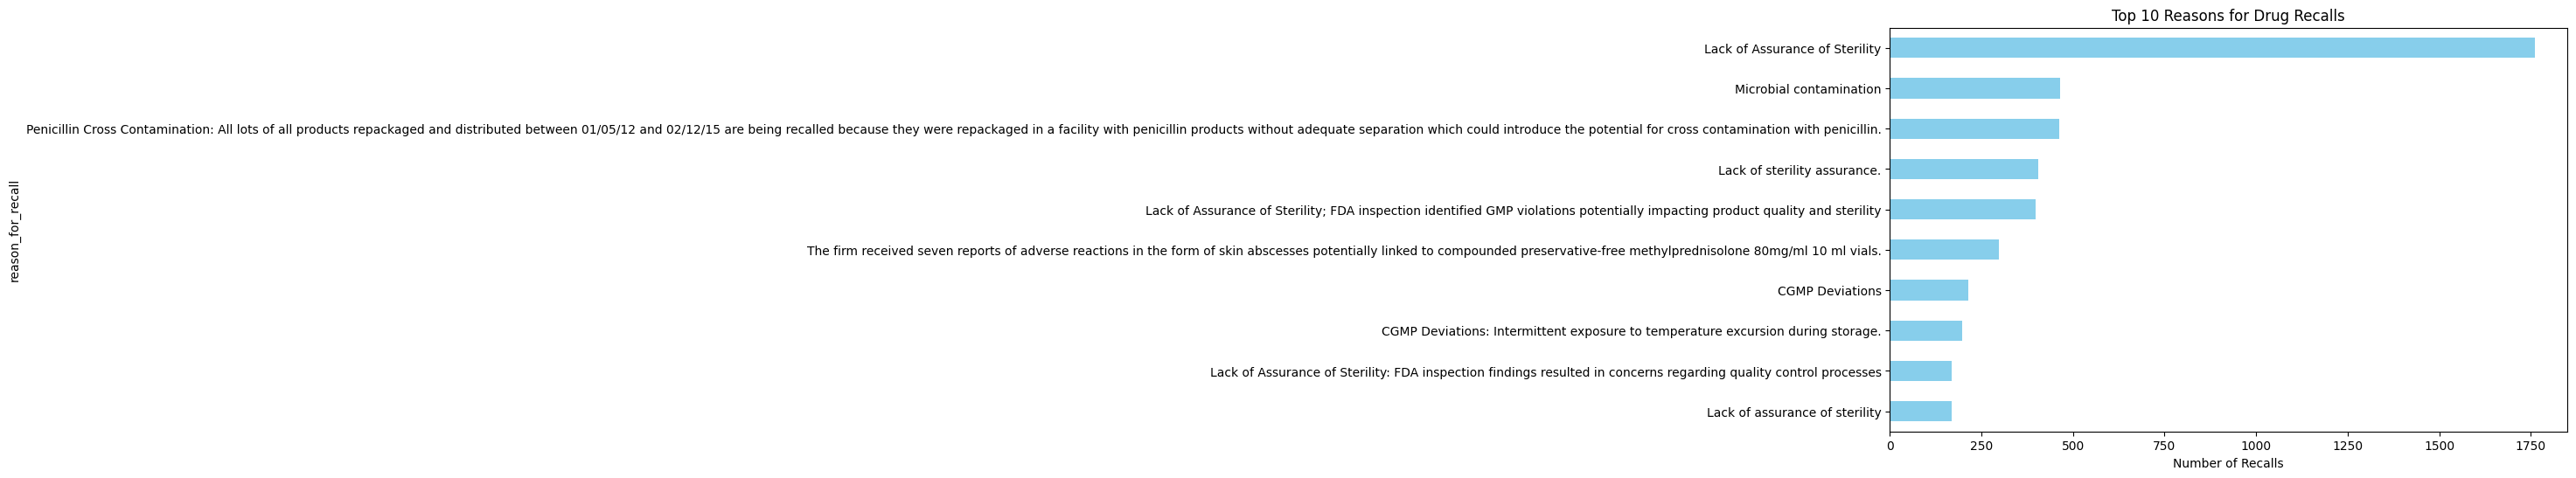

In [126]:
#Countting occurrences of each recall reason
top_reasons = df['reason_for_recall'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_reasons.plot(kind='barh', color='skyblue')

plt.xlabel("Number of Recalls")
plt.title("Top 10 Reasons for Drug Recalls")
plt.gca().invert_yaxis()  # Optional: Highest bar at the top
plt.tight_layout()

#Display
plt.show()

**The recall reasons were often repetitive or phrased differently but meant the same thing 
(e.g., “Lack of Assurance of Sterility”, “Lack of Sterility Assurance”, “Lack of Sterility”).**

**To simplify analysis, these were standardized into 10 main categories, while less frequent reasons were grouped into an "Others" category or ignored.**

In [127]:

# Converting to lowercase and cleaning up the column
df['reason_cleaned'] = df['reason_for_recall'].str.lower().str.strip()

# function to map to standard categories
def standardize_reason(reason):
    if 'cgmp' in reason:
        return 'CGMP Deviations'
    elif 'lack of assurance of sterility' in reason or 'sterility' in reason:
        return 'Lack of Assurance of Sterility'
    elif 'cross contamination' in reason:
        return 'Cross Contamination'
    elif 'defective container' in reason or 'packaging' in reason:
        return 'Packaging or Container Defect'
    elif 'mislabeling' in reason or 'label' in reason:
        return 'Mislabeling'
    elif 'failed specifications' in reason:
        return 'Failed Specifications'
    elif 'foreign tablet' in reason or 'foreign product' in reason:
        return 'Foreign Product Contamination'
    elif 'microbial' in reason:
        return 'Microbial Contamination'
    elif 'processing' in reason and 'control' in reason:
        return 'Lack of Processing Control'
    elif 'reports' in reason and 'adverse reactions' in reason:
        return 'Reports of Adverse Reactions'
    else:
        return 'Other'


df['reason_standardized'] = df['reason_cleaned'].apply(standardize_reason)

print(df['reason_standardized'].value_counts())


reason_standardized
Lack of Assurance of Sterility    5979
Other                             3806
CGMP Deviations                   3117
Mislabeling                       1565
Cross Contamination                721
Microbial Contamination            712
Lack of Processing Control         335
Reports of Adverse Reactions       298
Packaging or Container Defect      181
Foreign Product Contamination      101
Name: count, dtype: int64


In [128]:
'''# Checking other reasons
top_reasons = df[df['reason_standardized']=='Other'].reason_for_recall.value_counts().head(10)

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
top_reasons.plot(kind='barh', color='skyblue')

# Step 3: Customize the chart
plt.xlabel("Number of Recalls")
plt.title("Top 10 Reasons for Drug Recalls")
plt.gca().invert_yaxis()  # Optional: Highest bar at the top
plt.tight_layout()

# Step 4: Show the plot
plt.show() '''

'# Checking other reasons\ntop_reasons = df[df[\'reason_standardized\']==\'Other\'].reason_for_recall.value_counts().head(10)\n\n# Step 2: Plot the bar chart\nplt.figure(figsize=(10, 6))\ntop_reasons.plot(kind=\'barh\', color=\'skyblue\')\n\n# Step 3: Customize the chart\nplt.xlabel("Number of Recalls")\nplt.title("Top 10 Reasons for Drug Recalls")\nplt.gca().invert_yaxis()  # Optional: Highest bar at the top\nplt.tight_layout()\n\n# Step 4: Show the plot\nplt.show() '

## Plotting the standardized reasons

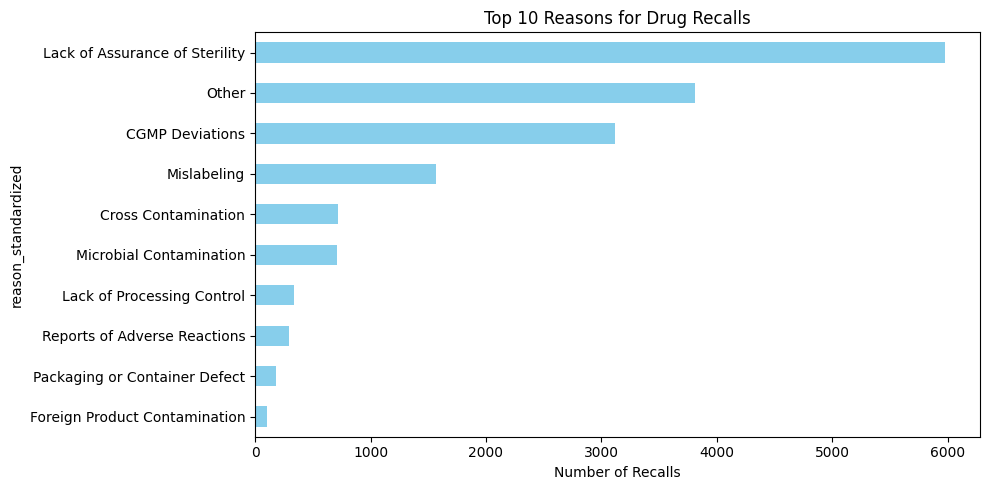

In [129]:

top_reasons = df['reason_standardized'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_reasons.plot(kind='barh', color='skyblue')

plt.xlabel("Number of Recalls")
plt.title("Top 10 Reasons for Drug Recalls")
plt.gca().invert_yaxis()  # Optional: Highest bar at the top
plt.tight_layout()

plt.show()

In [130]:
'''product type(otc/prescription)'''
df['openfda.product_type'].value_counts()


openfda.product_type
['HUMAN PRESCRIPTION DRUG']    2547
['HUMAN OTC DRUG']              417
Name: count, dtype: int64

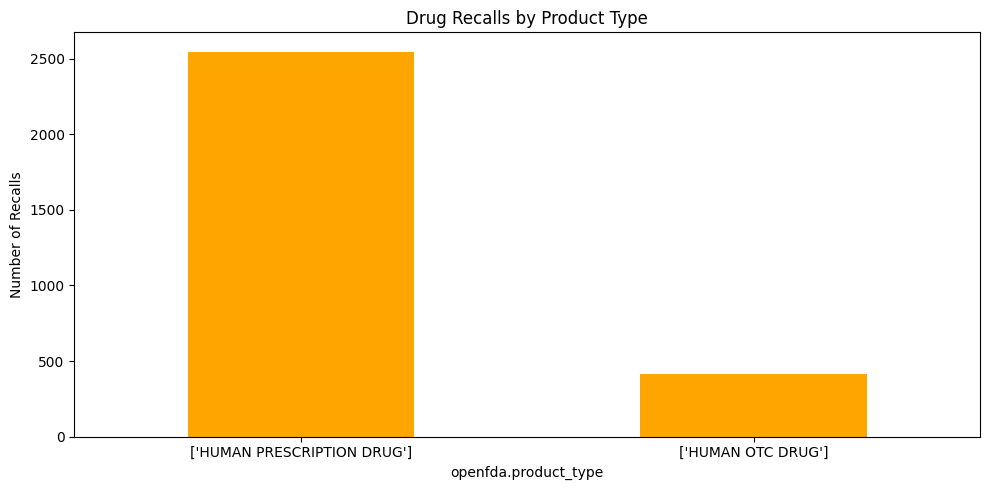

In [131]:
product_type = df['openfda.product_type'].value_counts()

plt.figure(figsize=(10,5))
product_type.plot(kind='bar', color='orange')
plt.title("Drug Recalls by Product Type")
plt.ylabel("Number of Recalls")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


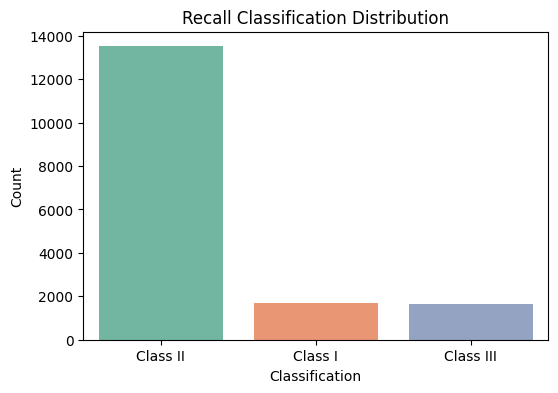

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='classification', order=df['classification'].value_counts().index, palette='Set2')
plt.title('Recall Classification Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

### Top 10 Recalling Pharmaceutical Firms

This bar chart displays the firms responsible for the highest number of drug recalls. These firms may have larger manufacturing volumes, more complex supply chains, or quality control challenges. 
Identifying them helps regulators and consumers focus on patterns of frequent recalls.

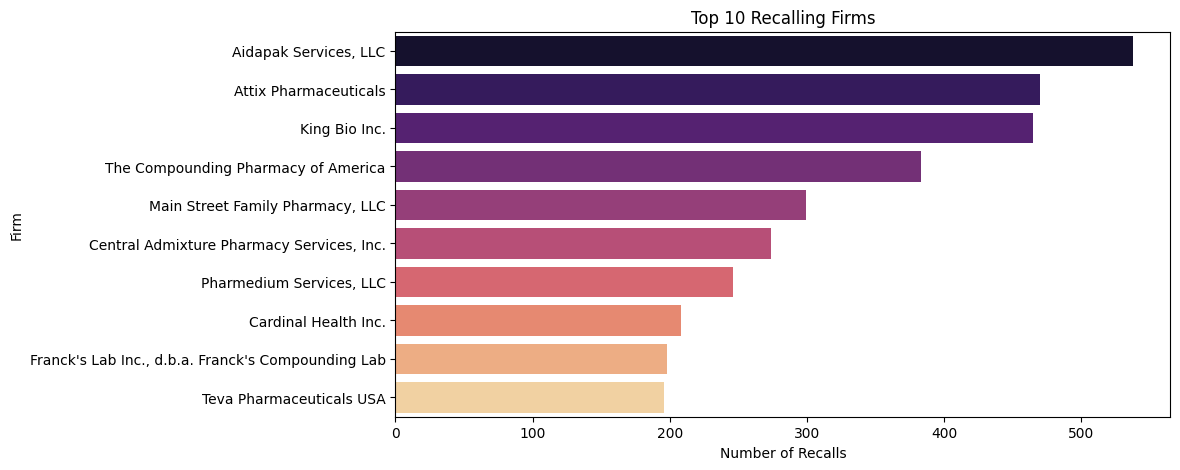

In [133]:
top_firms = df['recalling_firm'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_firms.index, x=top_firms.values, palette='magma')
plt.title('Top 10 Recalling Firms')
plt.xlabel('Number of Recalls')
plt.ylabel('Firm')
plt.show()


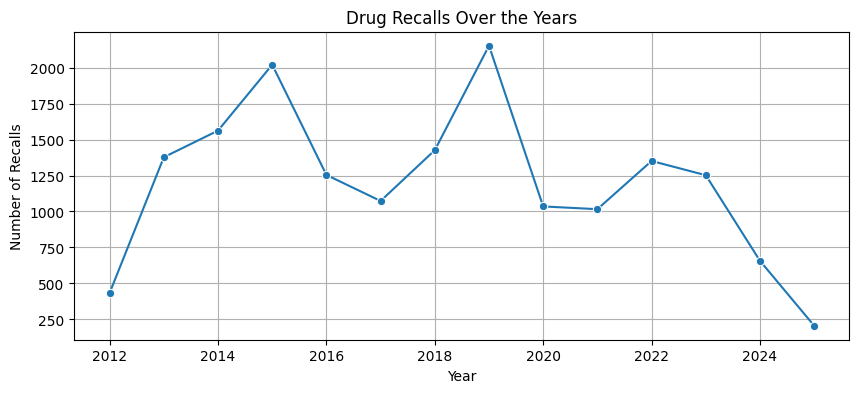

In [134]:
df['recall_year'] = df['report_date'].dt.year


recalls_per_year = df['recall_year'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=recalls_per_year.index, y=recalls_per_year.values, marker='o')
plt.title('Drug Recalls Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.show()


## Key Findings

1. **Most recalls are Class II**, which indicates moderate health risk. Very few Class I (severe risk) recalls occurred.
2. **The majority of recalls are voluntary**, showing proactive compliance by firms.
3. **Most common recall reasons** include incorrect labeling, contamination, and failed specifications.
4. **Recalls peaked around certain years**, possibly indicating regulatory changes or batch failures.
5. **A small group of pharmaceutical firms** account for a large number of recalls — which could be due to larger operations or manufacturing risks.
6. **Average delay from initiation to public report is noticeable**, which may impact public safety response.